In [1]:
import pandas as pd
import requests
r = requests.get(url='http://api.open-notify.org/iss-now.json')
r.json()

{'message': 'success',
 'iss_position': {'longitude': '-166.1307', 'latitude': '39.0684'},
 'timestamp': 1657869678}

In [2]:
url = 'http://api.open-notify.org/iss-now.json'

df = pd.read_json(url)

df

,message,iss_position,timestamp
latitude,success,39.0879,2022-07-15 07:21:19
longitude,success,-166.0994,2022-07-15 07:21:19


In [3]:
df['latitude'] = df.loc['latitude', 'iss_position']
df['longitude'] = df.loc['longitude', 'iss_position']
df.reset_index(inplace=True)

In [4]:
df

,index,message,iss_position,timestamp,latitude,longitude
0,latitude,success,39.0879,2022-07-15 07:21:19,39.0879,-166.0994
1,longitude,success,-166.0994,2022-07-15 07:21:19,39.0879,-166.0994


In [5]:
df = df.drop(['index','message'], axis =1)

In [6]:
df

,iss_position,timestamp,latitude,longitude
0,39.0879,2022-07-15 07:21:19,39.0879,-166.0994
1,-166.0994,2022-07-15 07:21:19,39.0879,-166.0994


In [7]:
record_data = True
if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    import time
    starttime=time.time()

    space_station_data = []
    while True: 
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        space_station_location = (r.json())
        print(space_station_location)

        space_station_data.append([space_station_location['timestamp'],
                                space_station_location['iss_position']['latitude'],
                                space_station_location['iss_position']['longitude']
                                ])

        tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
        tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
        
        if len(space_station_data) > 110:
            break
      
        time.sleep(10)

{'message': 'success', 'iss_position': {'longitude': '-165.4377', 'latitude': '39.4947'}, 'timestamp': 1657869689}
{'message': 'success', 'iss_position': {'longitude': '-164.7678', 'latitude': '39.8971'}, 'timestamp': 1657869700}
{'message': 'success', 'iss_position': {'longitude': '-164.0569', 'latitude': '40.3140'}, 'timestamp': 1657869711}
{'message': 'success', 'iss_position': {'longitude': '-163.3696', 'latitude': '40.7072'}, 'timestamp': 1657869721}
{'message': 'success', 'iss_position': {'longitude': '-162.6735', 'latitude': '41.0958'}, 'timestamp': 1657869732}
{'message': 'success', 'iss_position': {'longitude': '-161.9688', 'latitude': '41.4796'}, 'timestamp': 1657869742}
{'message': 'success', 'iss_position': {'longitude': '-161.2553', 'latitude': '41.8585'}, 'timestamp': 1657869753}
{'message': 'success', 'iss_position': {'longitude': '-160.5328', 'latitude': '42.2322'}, 'timestamp': 1657869763}
{'message': 'success', 'iss_position': {'longitude': '-159.7660', 'latitude': '4

In [8]:
iss_flight_record = pd.read_csv('ISS_location_20220715152129.csv')


from datetime import datetime


date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']] 

iss_flight_record['date'] = date_time

iss_flight_record['index'] = range(1,len(iss_flight_record)+1)
 
iss_flight_record.head()

,timestamp,latitude,longitude,date,index
0,1657869689,39.4947,-165.4377,2022-07-15 15:21:29,1
1,1657869700,39.8971,-164.7678,2022-07-15 15:21:40,2
2,1657869711,40.3140,-164.0569,2022-07-15 15:21:51,3
3,1657869721,40.7072,-163.3696,2022-07-15 15:22:01,4
4,1657869732,41.0958,-162.6735,2022-07-15 15:22:12,5


Text(0.5, 1.0, 'ISS Location')

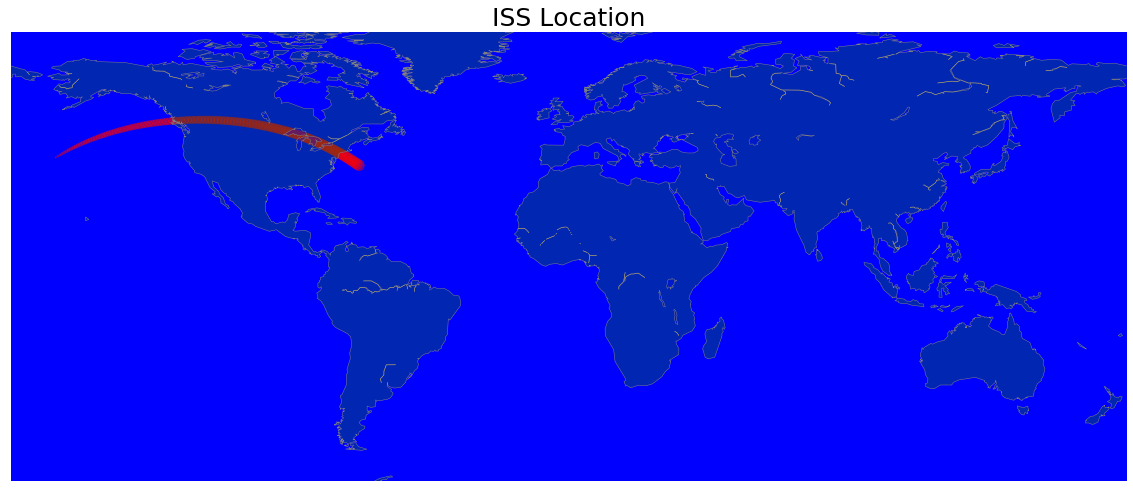

In [23]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


my_dpi = 96
plt.figure(figsize = (20, 15))

m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='Blue', linewidth=0)
m.fillcontinents(color='Green', alpha = 0.3)
m.drawcoastlines(linewidth=0.5, color='Grey')

m.scatter(iss_flight_record['longitude'], 
          iss_flight_record['latitude'], 
          s=iss_flight_record['index'] , alpha=0.4,color='Red')


plt.title('ISS Location', fontsize = 25)